In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
recent_date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

previous_year=dt.date(2017, 8, 23) - dt.timedelta(days=365)
previous_year

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores
previous_year_prcp = (session.query(Measurement.date,func.avg(Measurement.prcp)).filter(Measurement.date>previous_year).
                 group_by(Measurement.date).all())

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(previous_year_prcp, columns=['Date', 'Precipitation']).set_index('Date')
prcp_df

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [14]:
# Sort the dataframe by date
prcp_df.sort_values(by=['Date'],inplace=True,ascending=True)

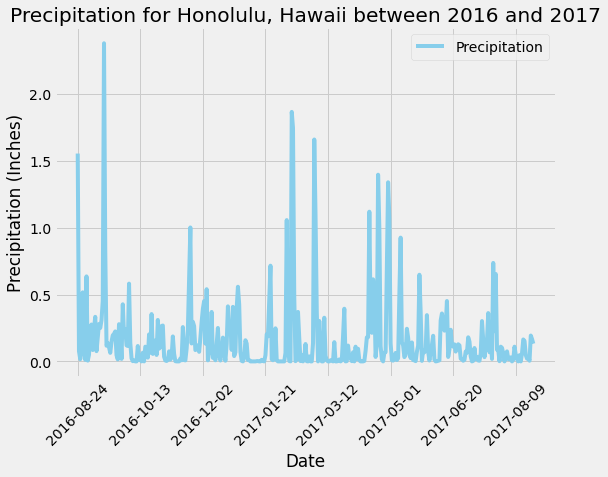

<Figure size 432x288 with 0 Axes>

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title="Precipitation for Honolulu, Hawaii between 2016 and 2017",figsize=(8,6), color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station).count()
print(f'Total stations: {total_stations}')

Total stations: 9


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity=(session.query(Measurement.station, func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs=[Measurement.station, 
             func.min(Measurement.tobs), 
             func.max(Measurement.tobs), 
             func.avg(Measurement.tobs)]

active_station=(session.query(*tobs)
                       .filter(Measurement.station=='USC00519281')
                       .all())


active_station_temp=pd.DataFrame(active_station, columns=['station', 'min_temp', 
                                                          'max_temp', 'avg_temp'])
active_station_temp.set_index('station', inplace=True)
active_station_temp

,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_tobs=(session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > previous_year)
                  .filter(Measurement.station=='USC00519281')
                  .all())


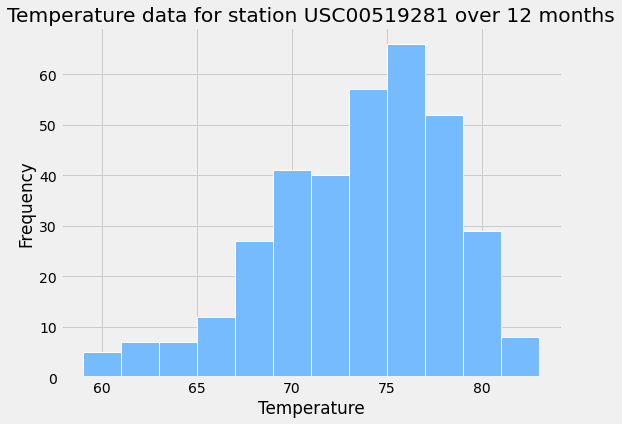

<Figure size 432x288 with 0 Axes>

In [22]:
previous_year_tobs_df = pd.DataFrame(year_tobs, columns=['Station','Temperature']).set_index('Station')
previous_year_tobs_df.hist(figsize=(8,6),bins=12, edgecolor='xkcd:white'
         ,linewidth=1,color='xkcd:sky blue')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature data for station USC00519281 over 12 months')
plt.show()

# Close session

In [29]:
# Close Session
session.close()